<a href="https://colab.research.google.com/github/fabehashahzad/CNN-model-on-cifar-10/blob/main/alexanet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 96)          34944     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 4, 4, 96)          0         
 g2D)                                                            
                                                                 
 batch_normalization_21 (Ba  (None, 4, 4, 96)          384       
 tchNormalization)                                               
                                                                 
 conv2d_16 (Conv2D)          (None, 4, 4, 256)         614656    
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 2, 2, 256)         0   

Epoch 1/30


<ipython-input-7-2dab1bec782b>:110: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_lr_001 = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),


780/780 [==============================] - 35s 42ms/step - loss: 2.0357 - accuracy: 0.3151 - val_loss: 1.4721 - val_accuracy: 0.4740 - lr: 0.0100
Epoch 2/30
780/780 [==============================] - 32s 41ms/step - loss: 1.6553 - accuracy: 0.4296 - val_loss: 1.5069 - val_accuracy: 0.5250 - lr: 0.0100
Epoch 3/30
780/780 [==============================] - 31s 40ms/step - loss: 1.4524 - accuracy: 0.4986 - val_loss: 1.3464 - val_accuracy: 0.5489 - lr: 0.0100
Epoch 4/30
780/780 [==============================] - 32s 42ms/step - loss: 1.3314 - accuracy: 0.5381 - val_loss: 1.1577 - val_accuracy: 0.6098 - lr: 0.0100
Epoch 5/30
780/780 [==============================] - 31s 40ms/step - loss: 1.2391 - accuracy: 0.5693 - val_loss: 1.1388 - val_accuracy: 0.6143 - lr: 0.0100
Epoch 6/30
780/780 [==============================] - 32s 41ms/step - loss: 1.1704 - accuracy: 0.5949 - val_loss: 1.0254 - val_accuracy: 0.6473 - lr: 0.0100
Epoch 7/30
780/780 [==============================] - 31s 40ms/step -

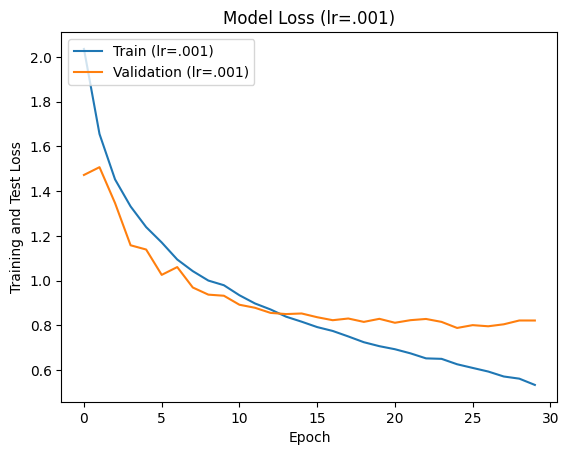

Epoch 1/30


<ipython-input-7-2dab1bec782b>:133: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_lr_01 = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),


780/780 [==============================] - 37s 43ms/step - loss: 0.5305 - accuracy: 0.8120 - val_loss: 0.8203 - val_accuracy: 0.7391 - lr: 0.0100
Epoch 2/30
780/780 [==============================] - 34s 43ms/step - loss: 0.5174 - accuracy: 0.8168 - val_loss: 0.8628 - val_accuracy: 0.7255 - lr: 0.0100
Epoch 3/30
780/780 [==============================] - 40s 51ms/step - loss: 0.5035 - accuracy: 0.8200 - val_loss: 0.8409 - val_accuracy: 0.7330 - lr: 0.0100
Epoch 4/30
780/780 [==============================] - 32s 41ms/step - loss: 0.4851 - accuracy: 0.8278 - val_loss: 0.8405 - val_accuracy: 0.7399 - lr: 0.0100
Epoch 5/30
780/780 [==============================] - 32s 41ms/step - loss: 0.4750 - accuracy: 0.8311 - val_loss: 0.8362 - val_accuracy: 0.7387 - lr: 0.0100
Epoch 6/30
780/780 [==============================] - 33s 42ms/step - loss: 0.4619 - accuracy: 0.8352 - val_loss: 0.8753 - val_accuracy: 0.7355 - lr: 0.0100
Epoch 7/30
780/780 [==============================] - 32s 41ms/step -

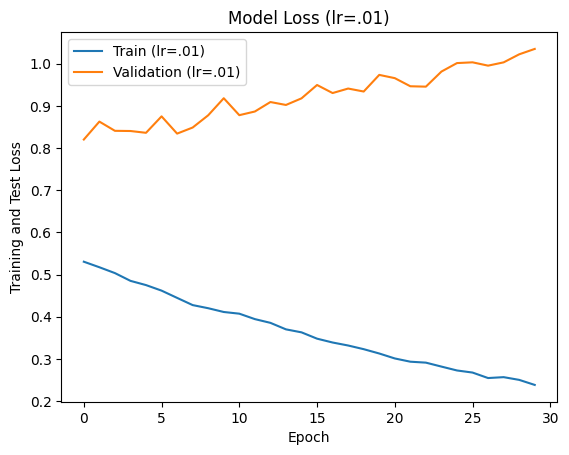

Loading the final test accuracies...
313/313 - 1s - loss: 1.0352 - accuracy: 0.7426 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 1.0352 - accuracy: 0.7426 - 1s/epoch - 3ms/step
Final Test Accuracy (lr=.001): 0.7426000237464905
Final Test Accuracy (lr=.01): 0.7426000237464905


In [7]:
#AlexNet architecture
import os
import keras
from keras.datasets import cifar10
from keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dense, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model
from keras.layers import Dropout, Flatten
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, TensorBoard
import matplotlib.pyplot as plt

num_classes = 10
batch_size = 64
epochs = 30
iterations = 780
DROPOUT = 0.5
CONCAT_AXIS = 3
DATA_FORMAT = 'channels_last'
log_filepath = 'C:\\Users\\Esrat Maria\\Desktop\\AlexNet'

def color_preprocessing(x_train, x_test):
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    mean = [125.307, 122.95, 113.865]
    std = [62.9932, 62.0887, 66.7048]
    for i in range(3):
        x_train[:, :, :, i] = (x_train[:, :, :, i] - mean[i]) / std[i]
        x_test[:, :, :, i] = (x_test[:, :, :, i] - mean[i]) / std[i]
    return x_train, x_test

# defining learning rate based on the number of epoch
def scheduler(epoch):
    if epoch < 100:
        return 0.01
    if epoch < 200:
        return 0.001
    return 0.0001

# loading cifar10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train, x_test = color_preprocessing(x_train, x_test)

# Building CNN (AlexNet)
def alexnet(img_input, classes=10):

  # 1st conv layer
  x = Conv2D(96, (11, 11), strides=(4, 4), padding='same',
             activation='relu', kernel_initializer='uniform')(img_input)  # valid
  x = MaxPooling2D(pool_size=(3, 3), strides=(
      2, 2), padding='same', data_format=DATA_FORMAT)(x)
  x = BatchNormalization()(x)

  # 2nd conv layer
  x = Conv2D(256, (5, 5), strides=(1, 1), padding='same',
             activation='relu', kernel_initializer='uniform')(x)
  x = MaxPooling2D(pool_size=(3, 3), strides=(
      2, 2), padding='same', data_format=DATA_FORMAT)(x)
  x = BatchNormalization()(x)

  # 3rd conv layer
  x = Conv2D(384, (3, 3), strides=(1, 1), padding='same',
             activation='relu', kernel_initializer='uniform')(x)
  x = BatchNormalization()(x)

  # 4th conv layer
  x = Conv2D(384, (3, 3), strides=(1, 1), padding='same',
             activation='relu', kernel_initializer='uniform')(x)
  x = BatchNormalization()(x)

  # 5th conv layer
  x = Conv2D(256, (3, 3), strides=(1, 1), padding='same',
             activation='relu', kernel_initializer='uniform')(x)
  x = MaxPooling2D(pool_size=(3, 3), strides=(
      2, 2), padding='same', data_format=DATA_FORMAT)(x)
  x = BatchNormalization()(x)

  # flattening before sending to fully connected layers
  x = Flatten()(x)
  # fully connected layers
  x = Dense(4096, activation='relu')(x)
  x = Dropout(0.5)(x)
  x = BatchNormalization()(x)
  x = Dense(1000, activation='relu')(x)
  x = Dropout(0.5)(x)
  x = BatchNormalization()(x)

  # output layer
  out = Dense(classes, activation='softmax')(x)
  return out


# defining input image size according to cifar10
img_input = Input(shape=(32, 32, 3))
output = alexnet(img_input)
model = Model(img_input, output)
model.summary()

# First Learning Rate (lr=.001)
sgd_lr_001 = optimizers.SGD(lr=.001, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd_lr_001, metrics=['accuracy'])
tb_cb_lr_001 = TensorBoard(log_dir=log_filepath + '_lr_001', histogram_freq=0)
change_lr_lr_001 = LearningRateScheduler(scheduler)
cbks_lr_001 = [change_lr_lr_001, tb_cb_lr_001]

datagen.fit(x_train)

history_lr_001 = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                                     steps_per_epoch=iterations,
                                     epochs=epochs,
                                     callbacks=cbks_lr_001,
                                     validation_data=(x_test, y_test))

# plotting loss VS epoch for lr=.001
plt.plot(history_lr_001.history['loss'], label='Loss (lr=.001)')
plt.plot(history_lr_001.history['val_loss'], label='val_loss (lr=.001)')
plt.title('Model Loss (lr=.001)')
plt.ylabel('Training and Test Loss')
plt.xlabel('Epoch')
plt.legend(['Train (lr=.001)', 'Validation (lr=.001)'], loc='upper left')
plt.show()

# Second Learning Rate (lr=.01)
sgd_lr_01 = optimizers.SGD(lr=.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd_lr_01, metrics=['accuracy'])
tb_cb_lr_01 = TensorBoard(log_dir=log_filepath + '_lr_01', histogram_freq=0)
change_lr_lr_01 = LearningRateScheduler(scheduler)
cbks_lr_01 = [change_lr_lr_01, tb_cb_lr_01]

history_lr_01 = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                                    steps_per_epoch=iterations,
                                    epochs=epochs,
                                    callbacks=cbks_lr_01,
                                    validation_data=(x_test, y_test))

# plotting loss VS epoch for lr=.01
plt.plot(history_lr_01.history['loss'], label='Loss (lr=.01)')
plt.plot(history_lr_01.history['val_loss'], label='val_loss (lr=.01)')
plt.title('Model Loss (lr=.01)')
plt.ylabel('Training and Test Loss')
plt.xlabel('Epoch')
plt.legend(['Train (lr=.01)', 'Validation (lr=.01)'], loc='upper left')
plt.show()

# Display final test accuracies
print('Loading the final test accuracies...')
test_loss_lr_001, test_acc_lr_001 = model.evaluate(x_test, y_test, verbose=2)
test_loss_lr_01, test_acc_lr_01 = model.evaluate(x_test, y_test, verbose=2)

# Final accuracies
print('Final Test Accuracy (lr=.001):', test_acc_lr_001)
print('Final Test Accuracy (lr=.01):', test_acc_lr_01)
